In [18]:
from basicgeo import P2, P3
from wingshape import WingShape
from parapolygraph import ParamPolyGraph, trimeshesflattener 
import numpy, math

freecadappimage = "freecad"   # nixos install


In [29]:
import pygmsh

capradius = 1
sphereradius = 2

truncationx = -0.4


anglestep = 5
d = 90 - math.degrees(math.asin(truncationx/capradius))
dsteps = int(2+d*2/anglestep)
dsteps
polyloop = [ P2(math.cos(math.radians(a)), math.sin(math.radians(a)))*capradius  for a in numpy.linspace(-d, d, dsteps) ]
mesh_size = 0.05

with pygmsh.geo.Geometry() as g:
    g.add_polygon(polyloop, mesh_size=mesh_size)
    mesh = g.generate_mesh()

uvpts = [ P2(p[0], p[1])  for p in mesh.points ]
pts = [ P3(p[0], p[1], math.sqrt(sphereradius**2 - p.Lensq()))  for p in uvpts ]

surfacemesh = { "polyloop":polyloop,
                "uvpts":uvpts, 
                "pts":numpy.array(pts),
                "tris":mesh.cells_dict["triangle"],
              }
trimeshesflattener([surfacemesh], freecadappimage)



/nix/store/sr711v3q725xxiybwnlfx6167s1zhqy4-python3.9-numpy-1.21.2/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=1412, tris=2693) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



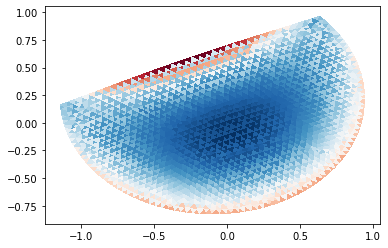

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

fpts = surfacemesh["fpts"]
tris = surfacemesh["tris"]
X = fpts[:,0]
Y = fpts[:,1]
    
areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
plt.tripcolor(X, Y, tris, facecolors=areachange, cmap='RdBu')
